#K-Means


In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

#KMeans
def KMeans(Data,K,x,y,itr=1e4,tol=1e-5,rep = 100):
    Distortion_out = 10**100
    #Repeating Algorithm and Choosing Cluster with Minimum Distortion
    for i in range(rep):
        iterate = itr
        #Choosing Cluster Mean points randomnly from Dataset
        KMean = np.random.permutation(Data)[:K]
        KMean_Prev = KMean*0
        #Computing KMeans for Clusters
        while(iterate and ((KMean - KMean_Prev)**2).sum()**0.5>tol):
            KMean_Prev = KMean
            Dist = np.zeros((Data.shape[0],K))
            #Computing Distance from Cluster Means
            for k in range(K):
              Dist[:,k] = ((Data - KMean[k])**2).sum(axis=1)

            # Expectation step
            # Estimate the assignment
            Cluster = Dist.argmin(axis=1)

            # Maximisation step
            # Reestmating the Cluster Means
            for k in range(K):
                if len(Data[Cluster==k]):
                  KMean[k] = Data[Cluster==k].mean(axis=0)
                else:
                  KMean[k] *= 0
            iterate-=1

        #Computing Distortion
        Distortion = 0
        for k in range(K):
            if len(Data[Cluster==k]):
              Distortion += sum(((Data[Cluster==k] - KMean[k])**2).sum(axis=1)**0.5)

        #Cluster With Minimum Distortion
        if Distortion<Distortion_out:
          Distortion_out, Cluster_out, KMean_out = Distortion, Cluster, KMean

    #Calling Plot Function
    Plot(Cluster_out, KMean_out, K,x,y)
    return Distortion_out,Cluster_out

#Note:
Each cluster is assigned with the most frequent class label

As no of clusters(K) increases classification accuracy increases generally.

In [ ]:
def Classification(Cluster,y,K):
    #Predicted Class
    Prediction = Cluster.copy()

    Confusion_Matrix = np.zeros((2,2))
    for k in range(K):
        #Most frequent class is assigned as the class of a cluster
        predicted_class = stats.mode(y[Cluster==k])[0]
        Prediction[Cluster==k] = predicted_class

    #Confusion Matrix
    for og_class in range(1,3):
        for pred_class in range(1,3):
            Confusion_Matrix[og_class-1][pred_class-1] = sum(y[Prediction==pred_class]==og_class)

    Confusion_Matrix = np.int64(Confusion_Matrix)
    Accuracy = 0
    Precision= 0
    Recall   = 0
    F1_score = 0
    for i in range(2):
        Accuracy += Confusion_Matrix[i][i]
        if sum(Confusion_Matrix[i]):
            Precision+= Confusion_Matrix[i][i]/sum(Confusion_Matrix[i])*sum(Confusion_Matrix[:,i])
        if sum(Confusion_Matrix[:,i]):
            Recall+=Confusion_Matrix[i][i]/sum(Confusion_Matrix[:,i])*sum(Confusion_Matrix[:,i])
    if Confusion_Matrix.sum():
        Accuracy /=Confusion_Matrix.sum()
        Precision/=Confusion_Matrix.sum()
        Recall   /=Confusion_Matrix.sum()
    try:F1_score = 2*(Precision*Recall)/(Precision+Recall)
    except:F1_score = 0

    print('*'*38,'K = ',K,'*'*38)
    print('Confusion Matrix:\n',Confusion_Matrix)
    print('Accuracy:\t',np.around(Accuracy,4))
    print('Precision:\t',np.around(Precision,4))
    print('Recall:\t\t',np.around(Recall,4))
    print('F1-Score:\t',np.around(F1_score,4))
    print('\n')

## Question 1


************************************** K =  2 **************************************
Confusion Matrix:
 [[1962   38]
 [  47 1953]]
Accuracy:	 0.9788
Precision:	 0.9788
Recall:		 0.9788
F1-Score:	 0.9788


************************************** K =  3 **************************************
Confusion Matrix:
 [[1970   30]
 [  33 1967]]
Accuracy:	 0.9842
Precision:	 0.9843
Recall:		 0.9842
F1-Score:	 0.9843


************************************** K =  4 **************************************
Confusion Matrix:
 [[1991    9]
 [  19 1981]]
Accuracy:	 0.993
Precision:	 0.993
Recall:		 0.993
F1-Score:	 0.993


************************************** K =  5 **************************************
Confusion Matrix:
 [[1985   15]
 [  15 1985]]
Accuracy:	 0.9925
Precision:	 0.9925
Recall:		 0.9925
F1-Score:	 0.9925


************************************** K =  6 **************************************
Confusion Matrix:
 [[1991    9]
 [  15 1985]]
Accuracy:	 0.994
Precision:	 0.994
Recall:		 0.994
F1

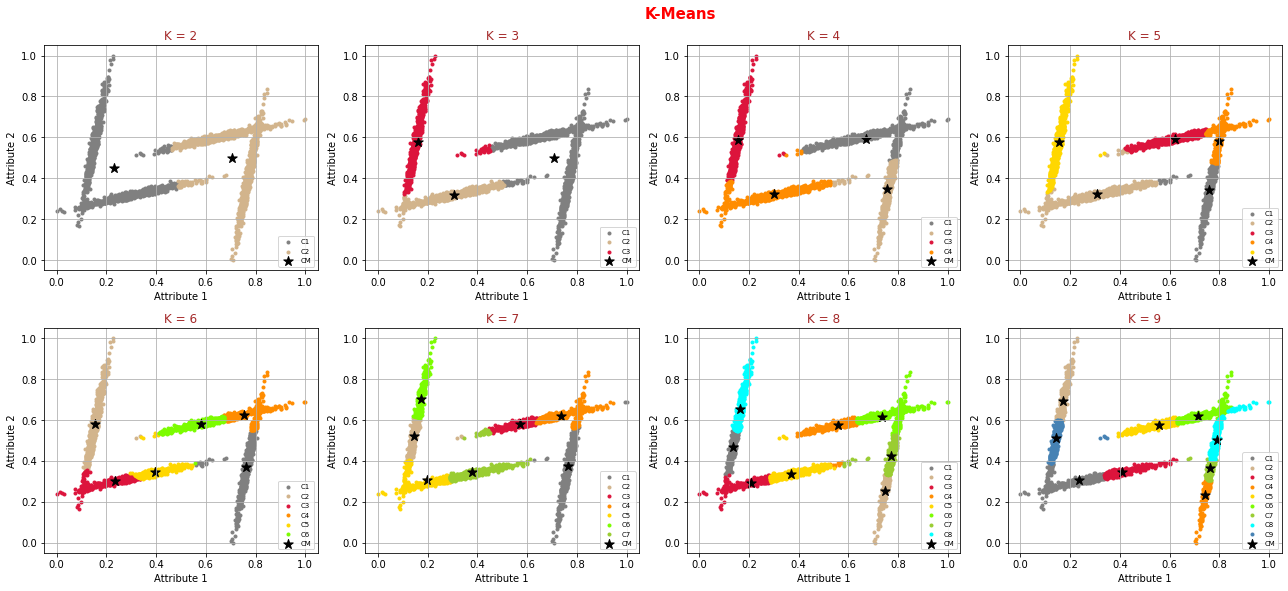

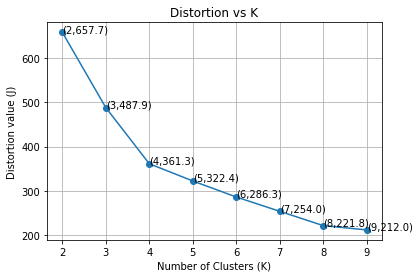

In [ ]:
#Data
C1 = pd.read_csv('Class1.txt',header=None)
C2 = pd.read_csv('Class2.txt',header=None)

Data = np.concatenate((C1,C2))

C1_labeled = np.zeros((C1.shape[0],C1.shape[1]+1))
C2_labeled = np.zeros((C2.shape[0],C2.shape[1]+1))

C1_labeled[:,:C1.shape[1]] = C1
C1_labeled[:,C1.shape[1]]  =  1
C2_labeled[:,:C2.shape[1]] = C2
C2_labeled[:,C2.shape[1]]  =  2

Data_labeled = np.concatenate((C1_labeled,C2_labeled))

#Normalisation
Data = (Data - Data.min(axis=0)) / (Data.max(axis=0) - Data.min(axis=0))

#Plots
def Plot(Cluster,KMean,K,x,y):
    colours=['grey','tan','crimson','darkorange','gold','lawngreen','yellowgreen','cyan','steelblue','orchid',
            'lightgrey','wheat','olive','seagreen','teal','slategray','lavender','slateblue','fuchsia','pink','crimson']
    #Scatter PLots of Clusters and Cluster Means
    for k in range(K):
        ax[x][y].scatter(Data[Cluster==k][:,0],Data[Cluster==k][:,1],
                    marker='.',label='C'+str(k+1),color=colours[k%len(colours)])
    ax[x][y].scatter(KMean[:,0],KMean[:,1],
                    marker='*',s=100,label='CM',color='black')
    ax[x][y].set_xlabel('Attribute 1')
    ax[x][y].set_ylabel('Attribute 2')
    ax[x][y].set_title('K = '+str(K),color='brown')
    ax[x][y].legend(fontsize=7,loc='lower right')
    ax[x][y].grid()

K = [2,3,4,5,6,7,8,9]
Distortion = []
a = 2;b = int(np.ceil(len(K)/a))
fig,ax = plt.subplots(a,b,squeeze=False,figsize=(4.5*b,4*a))
fig.text(0.5,1,'K-Means',color='Red',fontsize=15,fontweight='bold')
x,y = 0,0
for k in K:
    J,Cluster = KMeans(Data, k,x,y)
    Y = Data_labeled[:,-1]
    #For Classification
    Classification(Cluster, Y, k)
    Distortion.append(J)
    y+=1
    if y==b:x+=1;y=0
plt.tight_layout()
plt.show()

#Distortion vs K
plt.plot(K,Distortion,marker='o')
for i in range(len(Distortion)):
  a=round(K[i],1)
  b=round(Distortion[i],1)
  txt = '(' + str(a) + ',' + str(b) + ')'
  plt.annotate(txt,(K[i],Distortion[i]))
plt.title('Distortion vs K')
plt.xlabel('Number of Clusters (K)');plt.ylabel('Distortion value (J)')
plt.grid()
plt.show()

## Question 2a

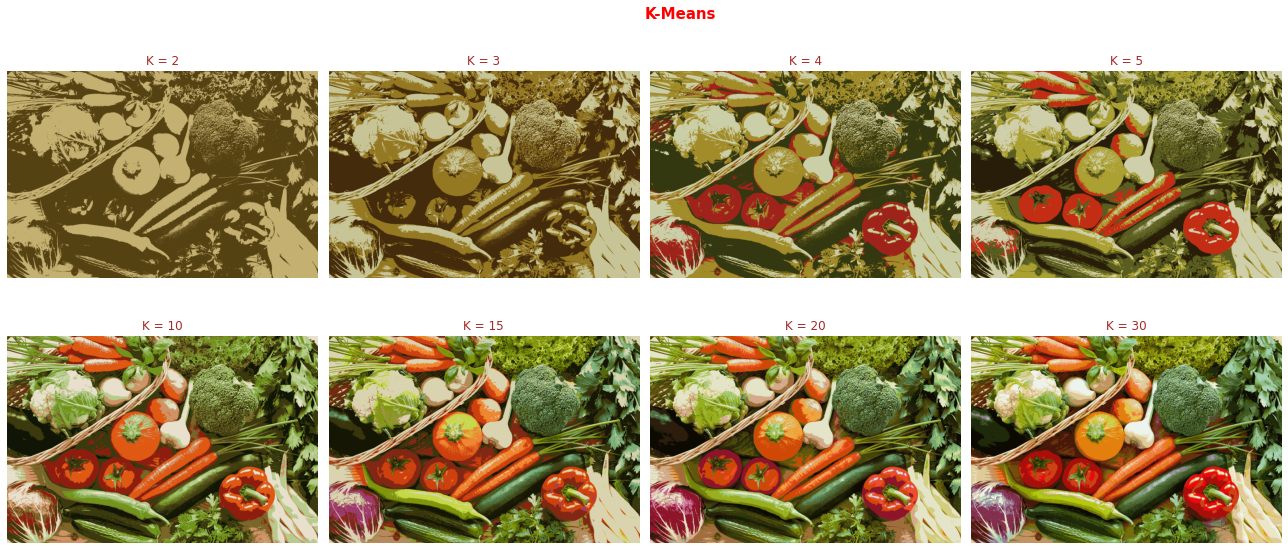

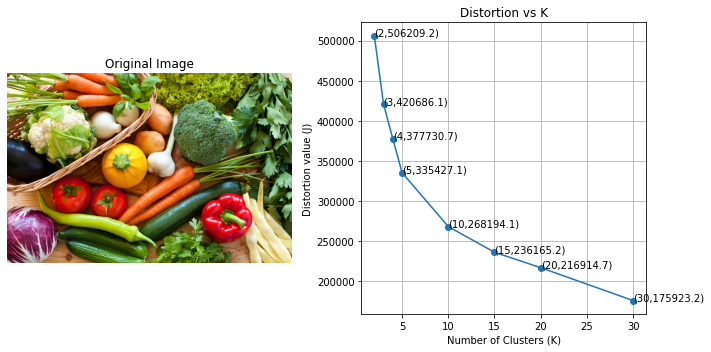

In [ ]:
Img = plt.imread('Image.jpg')
Data = Img.reshape(-1,Img.shape[2])

#Normalisation
Data = (Data - Data.min(axis=0)) / (Data.max(axis=0) - Data.min(axis=0))

def Plot(Cluster,KMean,K,x,y):
    Data_out = Data.copy()
    #Assinging Cluster Mean as Data Point
    for k in range(K):
       Data_out[Cluster==k] = KMean[k]
    #Clustered Image
    ax[x][y].imshow(Data_out.reshape(Img.shape))
    ax[x][y].set_title('K = '+str(K),color='brown')
    ax[x][y].axis('off')

K = [2,3,4,5,10,15,20,30]
Distortion = []
a = 2;b = int(np.ceil(len(K)/a))
fig,ax = plt.subplots(a,b,squeeze=False,figsize=(4.5*b,4*a))
fig.text(0.5,1,'K-Means',color='Red',fontsize=15,fontweight='bold')
x,y = 0,0
for k in K:
    J,_ = KMeans(Data, k,x,y,itr=1e2,tol=1e-5,rep = 10)
    Distortion.append(J)
    y+=1
    if y==b:x+=1;y=0
plt.tight_layout()
plt.show()

fig,ax = plt.subplots(1,2,squeeze=False,figsize=(10,5))
ax[0][0].imshow(Img)
ax[0][0].axis('off')
ax[0][0].set_title('Original Image')
#Distortion vs K
ax[0][1].plot(K,Distortion,marker='o')
for i in range(len(Distortion)):
  a=round(K[i],1)
  b=round(Distortion[i],1)
  txt = '(' + str(a) + ',' + str(b) + ')'
  ax[0][1].annotate(txt,(K[i],Distortion[i]))
ax[0][1].set_title('Distortion vs K')
ax[0][1].set_xlabel('Number of Clusters (K)');plt.ylabel('Distortion value (J)')
ax[0][1].grid()
plt.tight_layout()
plt.show()

#Question 2 b


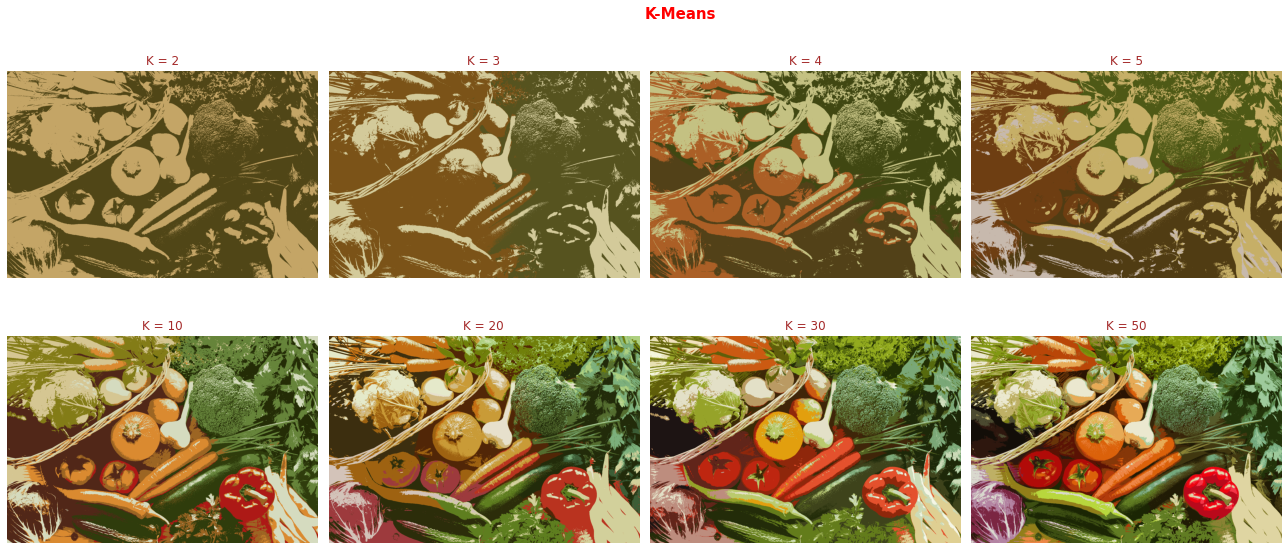

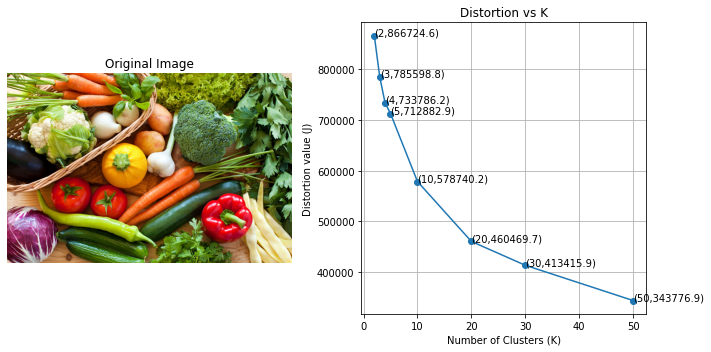

In [ ]:
Img = plt.imread('Image.jpg')
IMG = np.zeros((Img.shape[0],Img.shape[1],Img.shape[2]+2))
IMG[:,:,:3] = Img
for x in range(Img.shape[0]):
  for y in range(Img.shape[1]):
    IMG[x][y][3] = x
    IMG[x][y][4] = y

Data = IMG.reshape(-1,IMG.shape[2])

#Normalisation
Data = (Data - Data.min(axis=0)) / (Data.max(axis=0) - Data.min(axis=0))

def Plot(Cluster,KMean,K,x,y):
    Data_out = Data[:,:3].copy()
    #Assinging Cluster Mean as Data Point
    for k in range(K):
       Data_out[Cluster==k] = KMean[k][:3]
    #Clustered Image
    ax[x][y].imshow(Data_out.reshape(Img.shape))
    ax[x][y].set_title('K = '+str(K),color='brown')
    ax[x][y].axis('off')

K = [2,3,4,5,10,20,30,50]
Distortion = []
a = 2;b = int(np.ceil(len(K)/a))
fig,ax = plt.subplots(a,b,squeeze=False,figsize=(4.5*b,4*a))
fig.text(0.5,1,'K-Means',color='Red',fontsize=15,fontweight='bold')
x,y = 0,0
for k in K:
    J,_ = KMeans(Data, k,x,y,itr=1e2,tol=1e-5,rep = 10)
    Distortion.append(J)
    y+=1
    if y==b:x+=1;y=0
plt.tight_layout()
plt.show()

fig,ax = plt.subplots(1,2,squeeze=False,figsize=(10,5))
ax[0][0].imshow(Img)
ax[0][0].axis('off')
ax[0][0].set_title('Original Image')
#Distortion vs K
ax[0][1].plot(K,Distortion,marker='o')
for i in range(len(Distortion)):
  a=round(K[i],1)
  b=round(Distortion[i],1)
  txt = '(' + str(a) + ',' + str(b) + ')'
  ax[0][1].annotate(txt,(K[i],Distortion[i]))
ax[0][1].set_title('Distortion vs K')
ax[0][1].set_xlabel('Number of Clusters (K)');plt.ylabel('Distortion value (J)')
ax[0][1].grid()
plt.tight_layout()
plt.show()
